In [12]:
#26/7/24 For the visualisation of MorganFP mutagen data with UMAP

import pandas as pd
import numpy as np
#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/Padel/mutagen_padel.csv')
targetdata = targetdata.dropna(axis=0)
toxvals = targetdata['Toxicity_Value'].to_list

data = targetdata.iloc[:, 1:].values

In [13]:
#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=81)
#Converts Toxicity Values to a list
ytrain = trainset['Toxicity_Value']
ytest = testset['Toxicity_Value']
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:].values
xtest = testset.iloc[:, 2:].values

Text(0.5, 1.0, 'Mutagen MorganFP UMAP')

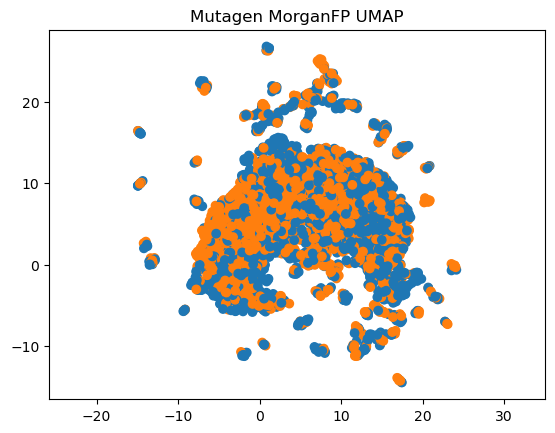

In [15]:
#Unsupervised UMAP
import umap
import matplotlib.pyplot as plt
import seaborn as sns
embedding = umap.UMAP(
                      init="random", 
                      min_dist=1, 
                      n_components=2, 
                      n_neighbors=9,
                      metric='euclidean'#, random_state=81
                     ).fit_transform(data)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in targetdata.Toxicity_Value.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Mutagen MorganFP UMAP')

In [12]:
svc = SVC().fit(xtrain, ytrain)
print(svc.score(xtest, ytest))
knn = KNeighborsClassifier().fit(xtrain, ytrain)
print(knn.score(xtest, ytest))

0.8323313293253173
0.790247160988644


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'Supervised UMAP')

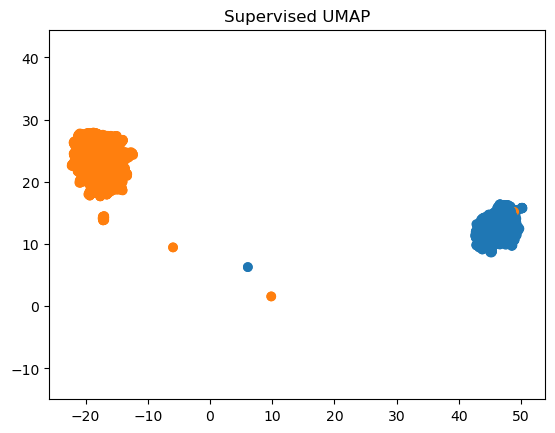

In [23]:
#Supervised UMAP
embedding = umap.UMAP(random_state=81, 
                      n_neighbors=63,
                      min_dist=0.58,
                      n_components=2).fit_transform(data, y=targetdata.Toxicity_Values)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in targetdata.Toxicity_Values.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Supervised UMAP')
#plt.savefig('outputs/test.pdf')

In [77]:
svc = SVC().fit(xtrain, ytrain)
print(svc.score(xtest, ytest))
knn = KNeighborsClassifier().fit(xtrain, ytrain)
print(knn.score(xtest, ytest))

0.5832389580973952
0.5458663646659117


In [11]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
#Supervised UMAP
embedding = umap.UMAP(random_state=81, 
                      n_neighbors=63,
                      min_dist=0.58,
                      n_components=50).fit(xtrain, y=ytrain)

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [73]:
svc = SVC().fit(xtrain, ytrain)
svc.score(xtest, ytest)
knn = KNeighborsClassifier().fit(xtrain, ytrain)
knn.score(xtest, ytest)

0.5458663646659117

0.5832389580973952

0.5458663646659117

In [80]:
svc.score(embedding.transform(xtest), ytest)
#0.5330313325783315

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [81]:
test_embedding = embedding.transform(xtest)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

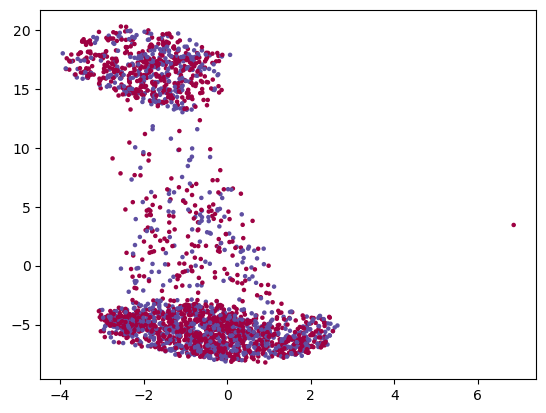

In [51]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=ytest, cmap='Spectral')

In [ ]:
#Export to file
dimred = pd.DataFrame(embedding)
concatdata = pd.concat([targetdata.SMILES, targetdata.Toxicity_Values, dimred], axis=1, ignore_index=True, sort=False)
concatdata = pd.DataFrame(concatdata)

concatdata.drop(concatdata.columns[0], axis=1)
labels = ['SMILES', 'Toxicity_Value', '1', '2']
concatdata.columns = labels
concatdata

concatdata.to_csv("dtargetUMAPdata.csv")